In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

In [2]:
# 한글폰트 사용
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv("서울특별시 코로나19 확진자 발생동향.csv",encoding='cp949') 
df.head(3)

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2021.12.14.00,187169,2062,39511,146263,624,1395,NaN,NaN,NaN,2021.12.14.00,528652,5567,88724,435541,4387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021.12.13.00,185108,2550,38113,145639,692,1356,NaN,NaN,NaN,2021.12.13.00,523088,5817,85231,433564,4293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021.12.12.00,182558,2528,36271,144947,998,1340,NaN,NaN,NaN,2021.12.12.00,512976,6689,77117,431606,4253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
df.shape

(680, 24)

In [5]:
# 결측값 검사
tot = df.isnull().sum().sort_values(ascending=False)
pct = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([tot, pct], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
서울시 의심환자 전체,493,0.725000
전국 의심환자 전체,493,0.725000
자가격리자 접촉자 감시해제,492,0.723529
자가격리자 접촉자 감시중,492,0.723529
자가격리자 해외입국자 감시해제,492,0.723529
자가격리자 해외입국자 감시중,492,0.723529
전국 의심환자 검사결과(음성),492,0.723529
서울시 의심환자 검사중,492,0.723529
서울시 의심환자 검사결과(음성),492,0.723529
전국 의심환자 검사중,492,0.723529


In [6]:
# 서울시만 추출 
df_seoul = df.iloc[:,:10]
df_seoul.tail(3)

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성)
677,2020.02.07.18,10,0,10,0,0,0,322.0,115.0,207.0
678,2020.02.06.09,11,0,11,0,0,0,192.0,28.0,164.0
679,2020.02.05.15,8,0,8,0,0,0,0.0,16.0,148.0


In [7]:
df_seoul["확진일"] = pd.to_datetime(df_seoul["서울시 기준일"])
df_seoul["년"] = df_seoul["확진일"].dt.year
df_seoul["월"] = df_seoul["확진일"].dt.month
df_seoul["주"] = df_seoul["확진일"].dt.week

In [8]:
df_seoul = df_seoul.drop(["서울시 기준일"], axis = 1)

In [9]:
df_seoul.head(3)

,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),확진일,년,월,주
0,187169,2062,39511,146263,624,1395,NaN,NaN,NaN,2021-12-14,2021,12,50
1,185108,2550,38113,145639,692,1356,NaN,NaN,NaN,2021-12-13,2021,12,50
2,182558,2528,36271,144947,998,1340,NaN,NaN,NaN,2021-12-12,2021,12,49


In [10]:
df_seoul.head()

,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),확진일,년,월,주
0,187169,2062,39511,146263,624,1395,NaN,NaN,NaN,2021-12-14,2021,12,50
1,185108,2550,38113,145639,692,1356,NaN,NaN,NaN,2021-12-13,2021,12,50
2,182558,2528,36271,144947,998,1340,NaN,NaN,NaN,2021-12-12,2021,12,49
3,180031,2835,34754,143949,1337,1328,NaN,NaN,NaN,2021-12-11,2021,12,49
4,177196,2800,33280,142612,837,1304,NaN,NaN,NaN,2021-12-10,2021,12,49


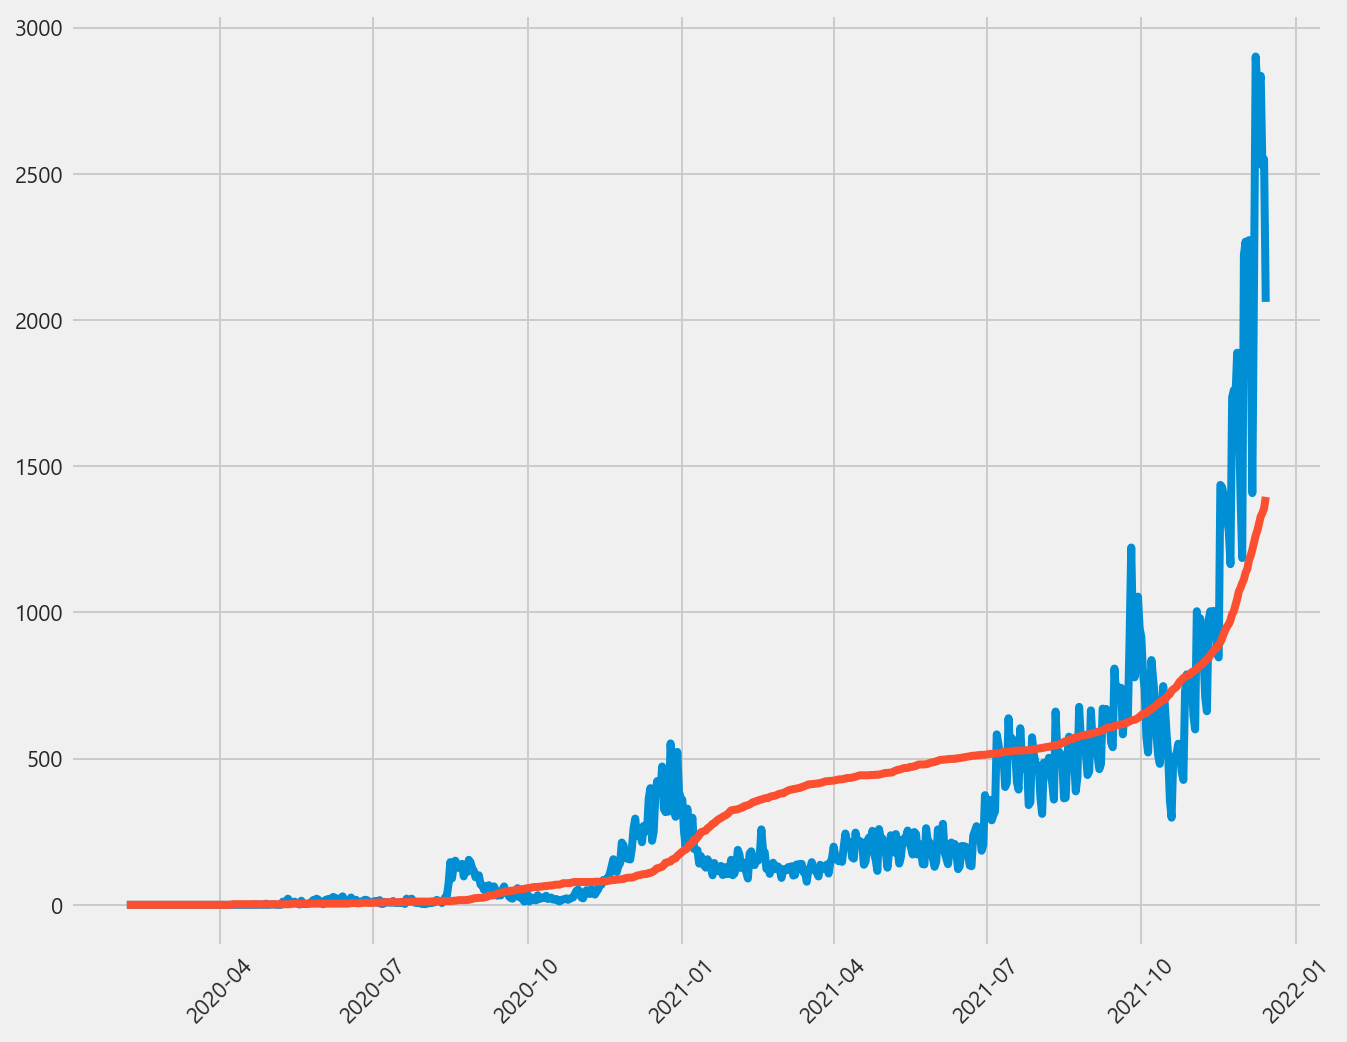

In [11]:
# 유의미한 컬럼은 서울시 추가확진 정도 

fig , ax = plt.subplots(figsize = (10,8))
ax.plot(df_seoul["확진일"] ,df_seoul["서울시 추가 확진"] )
ax.plot(df_seoul["확진일"] ,df_seoul["서울시 사망"] )
plt.xticks(rotation = 45)
plt.show()